In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
import re

SamSung Tv Scraping

In [53]:
url = 'https://www.walmart.com/ip/SAMSUNG-50-Class-DU7200B-Crystal-UHD-4K-Smart-TV-UN50DU7200BXZA-2024/5314190785?wmlspartner=wlpa&cn=FY25-ENTP-PMAX_cnv_dps_dsn_dis_ad_entp_e_n&gclsrc=aw.ds&adid=22222222297_0000000000_21835691471&wl0=&wl1=x&wl2=c&wl3=&wl4=&wl5=9003502&wl6=&wl7=&wl8=&wl9=&wl10=&wl11=&wl12=&veh=sem&gad_source=1&gclid=Cj0KCQiA6Ou5BhCrARIsAPoTxrBRCfOo3GGlFkg-kJXTyLozNunIxE9S86EbUMc6BTYTBRMpRnt76IYaAmDIEALw_wcB'

service = Service(r"C:\Users\stewa\OneDrive\chromedriver-win64\chromedriver.exe")  
driver = webdriver.Chrome(service=service) # ChatGPT

driver.get(url)
time.sleep(30)  # Wait for page to load so i can confirm im a human

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
    
#print(soup.prettify())  
print(soup.find('span',itemprop='price').text.strip())

driver.quit()

$328.00


Scraping Apple Airtag

In [ ]:
url2 ='https://www.walmart.com/ip/Apple-AirTag-1-Pack/5396499207?classType=REGULAR&athbdg=L1800&from=/search'

service = Service(r"C:\Users\stewa\OneDrive\chromedriver-win64\chromedriver.exe")  
driver = webdriver.Chrome(service=service) # ChatGPT

driver.get(url2)
time.sleep(30)  # Wait for page to load so i can confirm im a human

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

#print(soup.find_all('a',itemprop='ratingCount'))
ratings = soup.find('a',itemprop='ratingCount').text

driver.quit()

In [56]:
ratings

'836 ratings'

Scraping Airpods and JBL Tune Beams and finding price difference

In [ ]:
url3 = 'https://www.walmart.com/ip/Apple-AirPods-3rd-Generation/5527780373?classType=REGULAR&athbdg=L1800&from=/search'

# Airpods
service = Service(r"C:\Users\stewa\OneDrive\chromedriver-win64\chromedriver.exe")  
driver = webdriver.Chrome(service=service) # ChatGPT

driver.get(url3)
time.sleep(30) # Wait for page to load so i can confirm im a human

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

#print(soup.find_all('span',itemprop='price')) 
p1 = soup.find('span',itemprop='price').text.strip()
    
driver.quit()

AttributeError: 'NoneType' object has no attribute 'text'

In [58]:
url4 = 'https://www.walmart.com/ip/JBL-Tune-Beam-Headphones-in-Ear-Earbuds/1597454551?classType=VARIANT&athbdg=L1103&from=/search'
#JBL Tune Beams
service = Service(r"C:\Users\stewa\OneDrive\chromedriver-win64\chromedriver.exe")  
driver = webdriver.Chrome(service=service)

driver.get(url4)
time.sleep(30) # Wait for page to load so i can confirm im a human

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
    
p2 = soup.find('span',itemprop='price').text.strip()
    
driver.quit()

Finding the difference

In [73]:
#p1 = float(p1.replace('Now ','').replace('$', '').replace(',', ''))
#p2 = float(p2.replace('Now ','').replace('$', '').replace(',', ''))
#p1
#p2
print(abs(p2-p1))

15.0


Rating Distribution of Ring Doorbell

In [46]:
url5 ='https://www.walmart.com/ip/Wireless-Doorbell-Camera-with-Chime-Video-Doorbell-Security-Camera-with-Batteries-for-Home/5441809604?classType=REGULAR&athbdg=L1600&from=/search'

service = Service(r"C:\Users\stewa\OneDrive\chromedriver-win64\chromedriver.exe")  
driver = webdriver.Chrome(service=service) # ChatGPT

driver.get(url5)
time.sleep(30)  # Wait for page to load so i can confirm im a human

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

ratings = (soup.find_all('span',class_='w5 tl pl1 f7 nowrap'))
driver.quit()

Cleaning

In [47]:
stars = []
#ChatGPT
for item in ratings:
    if item:  # Check if item is a valid BeautifulSoup object
        # Extract the text from the span tag
        text = item.get_text()  # This gives you the raw string like '85% (712)'

        # Use regex to extract the number inside parentheses
        match = re.search(r'\((\d+)\)', text)
        if match:
            stars.append(int(match.group(1)))


Plotting The Ratings

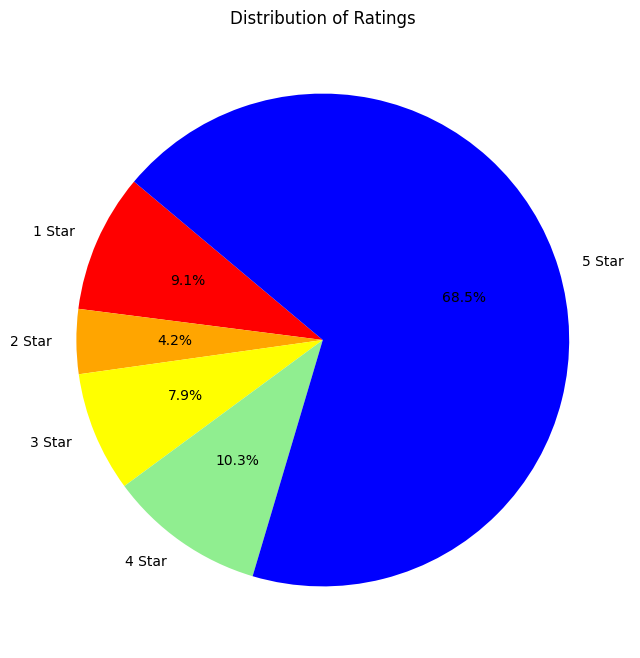

In [48]:
# Data for the pie chart
ratings = [stars[4], stars[3], stars[2], stars[1], stars[0]]
labels = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
colors = ['red', 'orange', 'yellow', 'lightgreen', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(ratings, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Ratings')

plt.show()

Scraping MacBook Sale

In [75]:
url6 = 'https://www.walmart.com/ip/Apple-MacBook-Air-13-3-inch-Laptop-Space-Gray-M1-Chip-8GB-RAM-256GB-storage/609040889?classType=VARIANT&from=/search'

service = Service(r"C:\Users\stewa\OneDrive\chromedriver-win64\chromedriver.exe")  
driver = webdriver.Chrome(service=service) # ChatGPT

driver.get(url6)
time.sleep(30) # Wait for page to load so i can confirm im a human

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
    
print(soup.find('span',class_='b lh-copy f5 green').text)

driver.quit()

$50.00
